In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import math
import os

In [108]:
from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(18, 7), "xtick.bottom": True, "grid.linestyle": ":"})

In [109]:
COLOR_DARK_BLUE = '#18206F'
COLOR_MEDIUMDARK_BLUE = '#3661AB'
COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
COLOR_LIGHT_BLUE = '#0FDFFF'

COLOR_DARK_GREEN = '#416224'
COLOR_MEDIUMDARK_GREEN = '#4FB800'
COLOR_MEDIUMLIGHT_GREEN = '#AEA700'
COLOR_LIGHT_GREEN = '#CDD30F'

COLOR_GLUTROT = '#DA3C43'
COLOR_DARK_RED = '#EC6200'
COLOR_MEDIUM_RED = '#ff8f1c'
COLOR_LIGHT_RED = '#ffb412'

HEIDENELKE_1 = '#9c004b'
HEIDENELKE_2 = '#cc0063'
HEIDENELKE_3 = '#f50076'
HEIDENELKE_4 = '#ff3396'
PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]

PALETTE_GREENS = [COLOR_DARK_GREEN, COLOR_MEDIUMDARK_GREEN, COLOR_MEDIUMLIGHT_GREEN, COLOR_LIGHT_GREEN]
PALETTE_GREENS_W = [COLOR_NONE, COLOR_DARK_GREEN, COLOR_MEDIUMDARK_GREEN, COLOR_MEDIUMLIGHT_GREEN, COLOR_LIGHT_GREEN]
PALETTE_MULTI = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_GREEN, COLOR_DARK_RED, HEIDENELKE_1]

# Preprocessing

In [110]:
PATH = "../data/easteregg_everything_so_far_250"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [111]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup_fullscreen': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data = pd.concat(file_data)
diff_program_means_dict['windup_fullscreen']

[2720.212,
 3617.832,
 3627.72,
 3133.5403225806454,
 3896.144,
 3548.856,
 3569.016,
 3039.32,
 4331.092,
 3204.744,
 3564.436,
 3565.616,
 3574.476,
 4367.116,
 3711.42,
 4445.324,
 3054.3333333333335,
 3518.344,
 3680.816,
 3157.409756097561,
 2752.537037037037,
 4314.572,
 3672.084,
 3053.0642570281125,
 3829.16,
 4212.24,
 2283.392,
 3666.704,
 2962.7871485943774,
 2133.736,
 1811.75,
 2301.421686746988,
 3652.644,
 2976.324,
 2128.892,
 1568.8947368421052,
 3413.02,
 1754.2307692307693,
 1682.8628318584072,
 3767.74,
 1813.6214953271028,
 2471.132530120482,
 2777.864,
 4282.775100401606,
 2829.128,
 3007.976,
 4093.176,
 4275.104,
 4120.5,
 2372.444,
 3029.864,
 4159.804,
 4391.86,
 3911.136,
 2385.388,
 4269.412,
 4165.268,
 3881.548,
 2389.652,
 2823.6352459016393,
 3944.1,
 4201.928,
 4045.408,
 2397.184,
 2862.420408163265,
 3872.884,
 4156.504,
 4318.64,
 1950.3253012048192,
 3151.871485943775,
 4691.7692307692305,
 4206.996,
 2383.724,
 3134.429718875502,
 3829.128,
 4423.9

### Only use fullscreen data here

In [112]:
data.loc[data.fullscreen == 'fullscreen', 'fullscreen'] = True
data = data[data['fullscreen'] == True]
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']
data = data[data['framework'] != 'DirectX11']

In [113]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [114]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
#data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1923954766.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [115]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

In [116]:
data_default = data[data['complexity'] == 'default']
data_rects = data[data['complexity'] == 'rects']
data_3D = data[data['complexity'] == '3D']
data_image = data[data['complexity'] == 'image']

In [117]:
# COLOR_DARK_BLUE = '#18206F'
# COLOR_MEDIUMDARK_BLUE = '#3661AB'
# COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
# COLOR_LIGHT_BLUE = '#0FDFFF'

# COLOR_GLUTROT = '#DA3C43'
# COLOR_DARK_RED = '#EC6200'
# COLOR_MEDIUM_RED = '#ff8f1c'
# COLOR_LIGHT_RED = '#ffb412'

# HEIDENELKE_1 = '#9c004b'
# HEIDENELKE_2 = '#cc0063'
# HEIDENELKE_3 = '#f50076'
# HEIDENELKE_4 = '#ff3396'

# PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

# PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
# PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

# PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
# PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]


# COLOR_NONE = '#8E8E8D'
# PALETTE_BLUES_W = [COLOR_NONE, COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
# PALETTE_REDS_W = [COLOR_NONE, COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
# PALETTE_HEIDENELKE_W = [COLOR_NONE, HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

# PALETTE_MULTI = [COLOR_NONE, COLOR_DARK_BLUE, COLOR_GLUTROT, COLOR_HEIDENELKE]
# PALETTE_THREE = [COLOR_DARK_BLUE, COLOR_GLUTROT, COLOR_HEIDENELKE]

# End-to-End Latency

## End-to-end latencies over all frameworks

Text(0.5, 1.0, 'end-to-end latency for pixel reader')

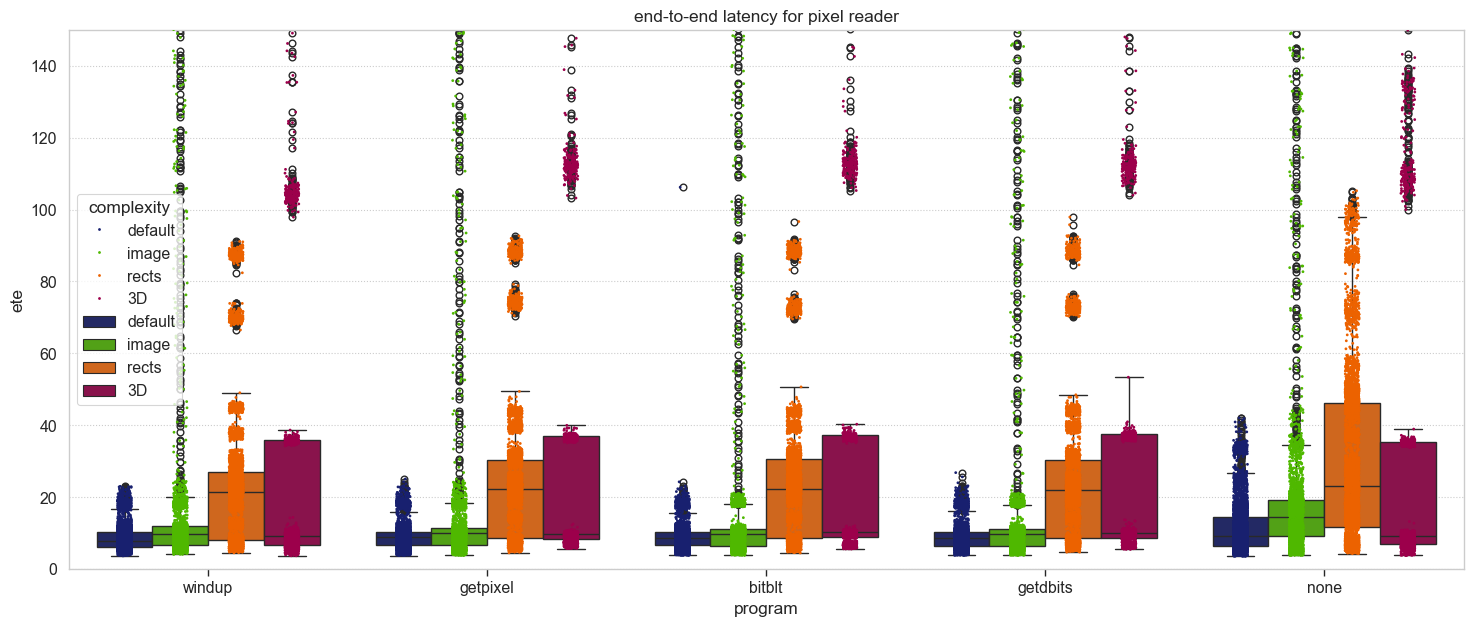

In [118]:
plot = sns.stripplot(data=data, x='program', y='ete', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_MULTI, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True, size=2)
plot = sns.boxplot(data=data, x='program', y='ete', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], palette=PALETTE_MULTI, order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], dodge=True)
plot.set_ylim(0, 150)
plot.set_title('end-to-end latency for pixel reader')

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\2952850843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_BLUES_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\2952850843.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_small = sns.boxplot(ax=axs[1], data=data_image, x='program', y='ete', palette=PALETTE_GREENS_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\2952850843.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed 

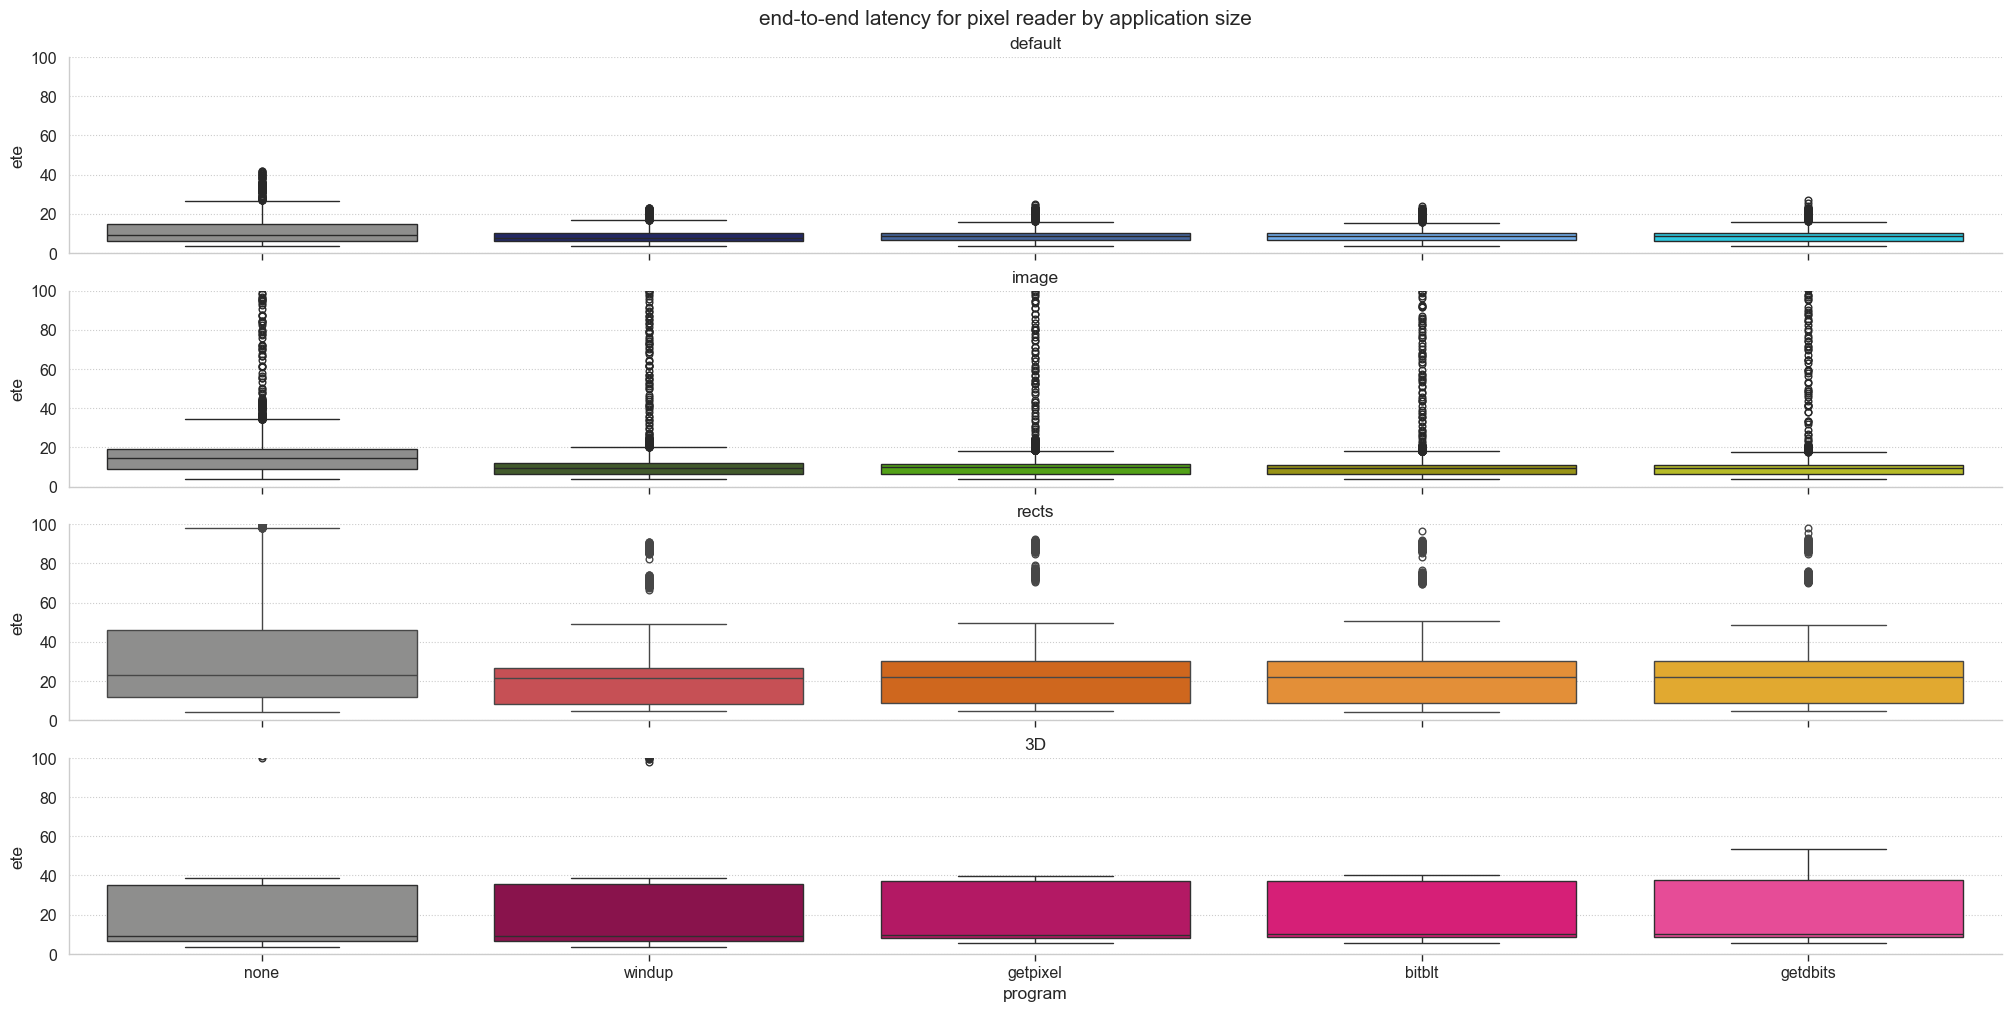

In [119]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 10))
fig.suptitle("end-to-end latency for pixel reader by application size")

#plot_fs = sns.stripplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_W_NREUTRAL_BLUE, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_fs = sns.boxplot(ax=axs[0], data=data_default, x='program', y='ete', palette=PALETTE_BLUES_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_fs.set_ylim(0, 100)
plot_fs.set_title('default')

plot_small = sns.boxplot(ax=axs[1], data=data_image, x='program', y='ete', palette=PALETTE_GREENS_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_small.set_ylim(0, 100)
plot_small.set_title('image')

#plot_nfs = sns.stripplot(ax=axs[1], data=data_rects, x='program', y='ete', palette=PALETTE_W_NREUTRAL_RED, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_nfs = sns.boxplot(ax=axs[2], data=data_rects, x='program', y='ete', palette=PALETTE_REDS_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_nfs.set_ylim(0, 100)
plot_nfs.set_title('rects')

#plot_small = sns.stripplot(ax=axs[2], data=data_3D, x='program', y='ete', palette=PALETTE_W_NREUTRAL_GREEN, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], size=2)
plot_small = sns.boxplot(ax=axs[3], data=data_3D, x='program', y='ete', palette=PALETTE_HEIDENELKE_W, order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])
plot_small.set_ylim(0, 100)
plot_small.set_title('3D')

sns.despine(bottom = False, left = False)

## End-to-end latencies for each framework

### frameworks separately

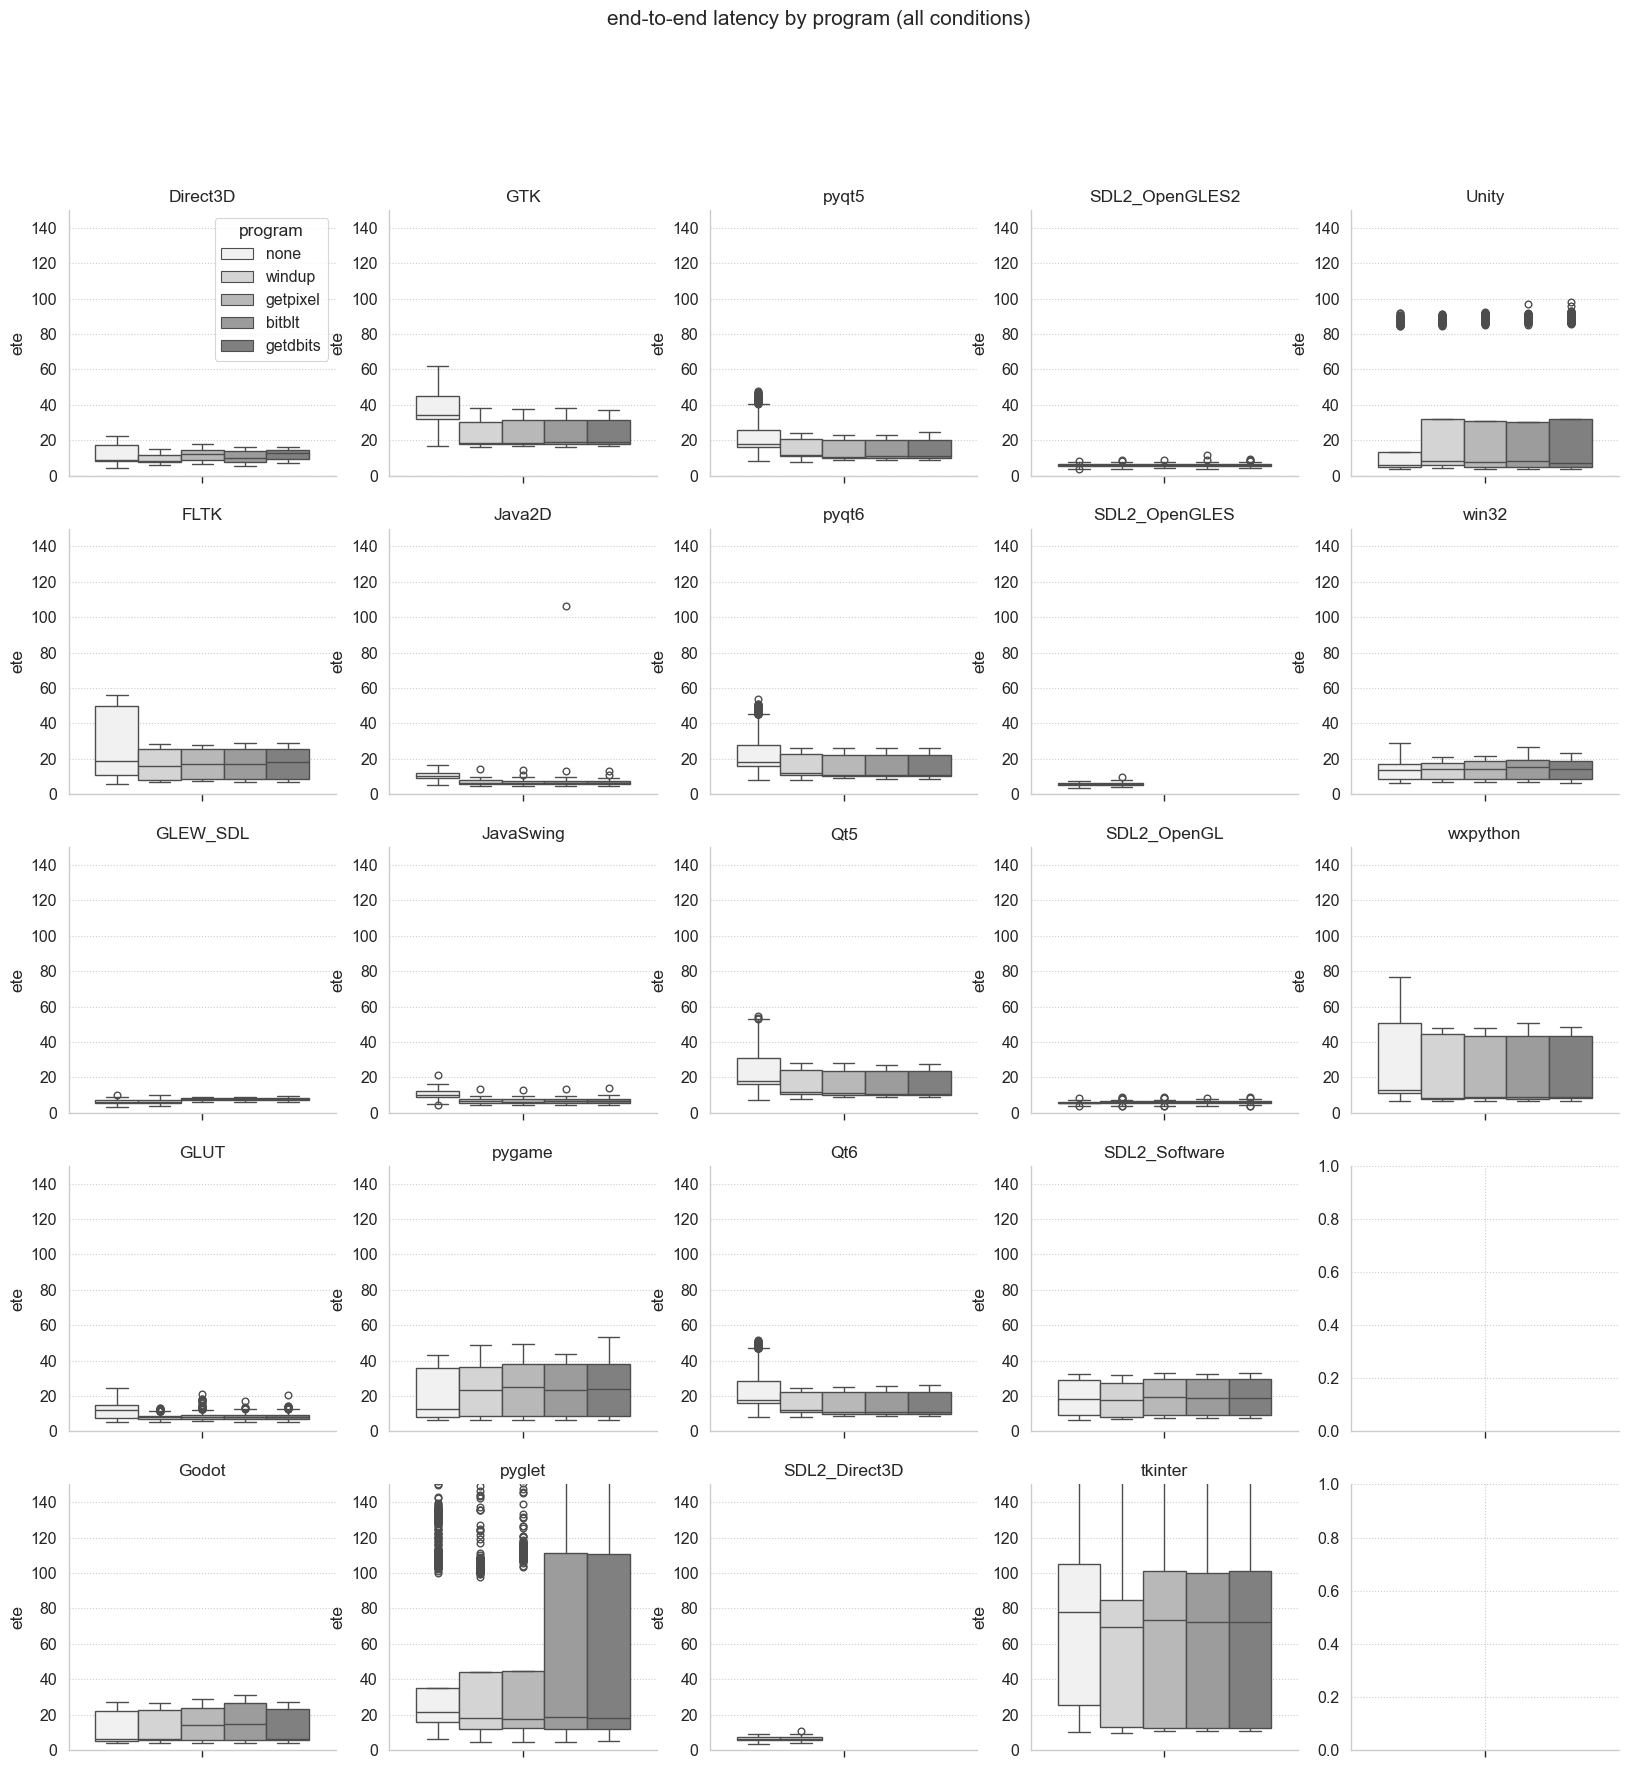

In [120]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=False)
fig.suptitle("end-to-end latency by program (all conditions)")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data[data['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette='light:grey')
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 150)
    axes[x, y].get_legend().set_visible(False)
axes[0, 0].get_legend().set_visible(True)

sns.despine(bottom = False, left = False)

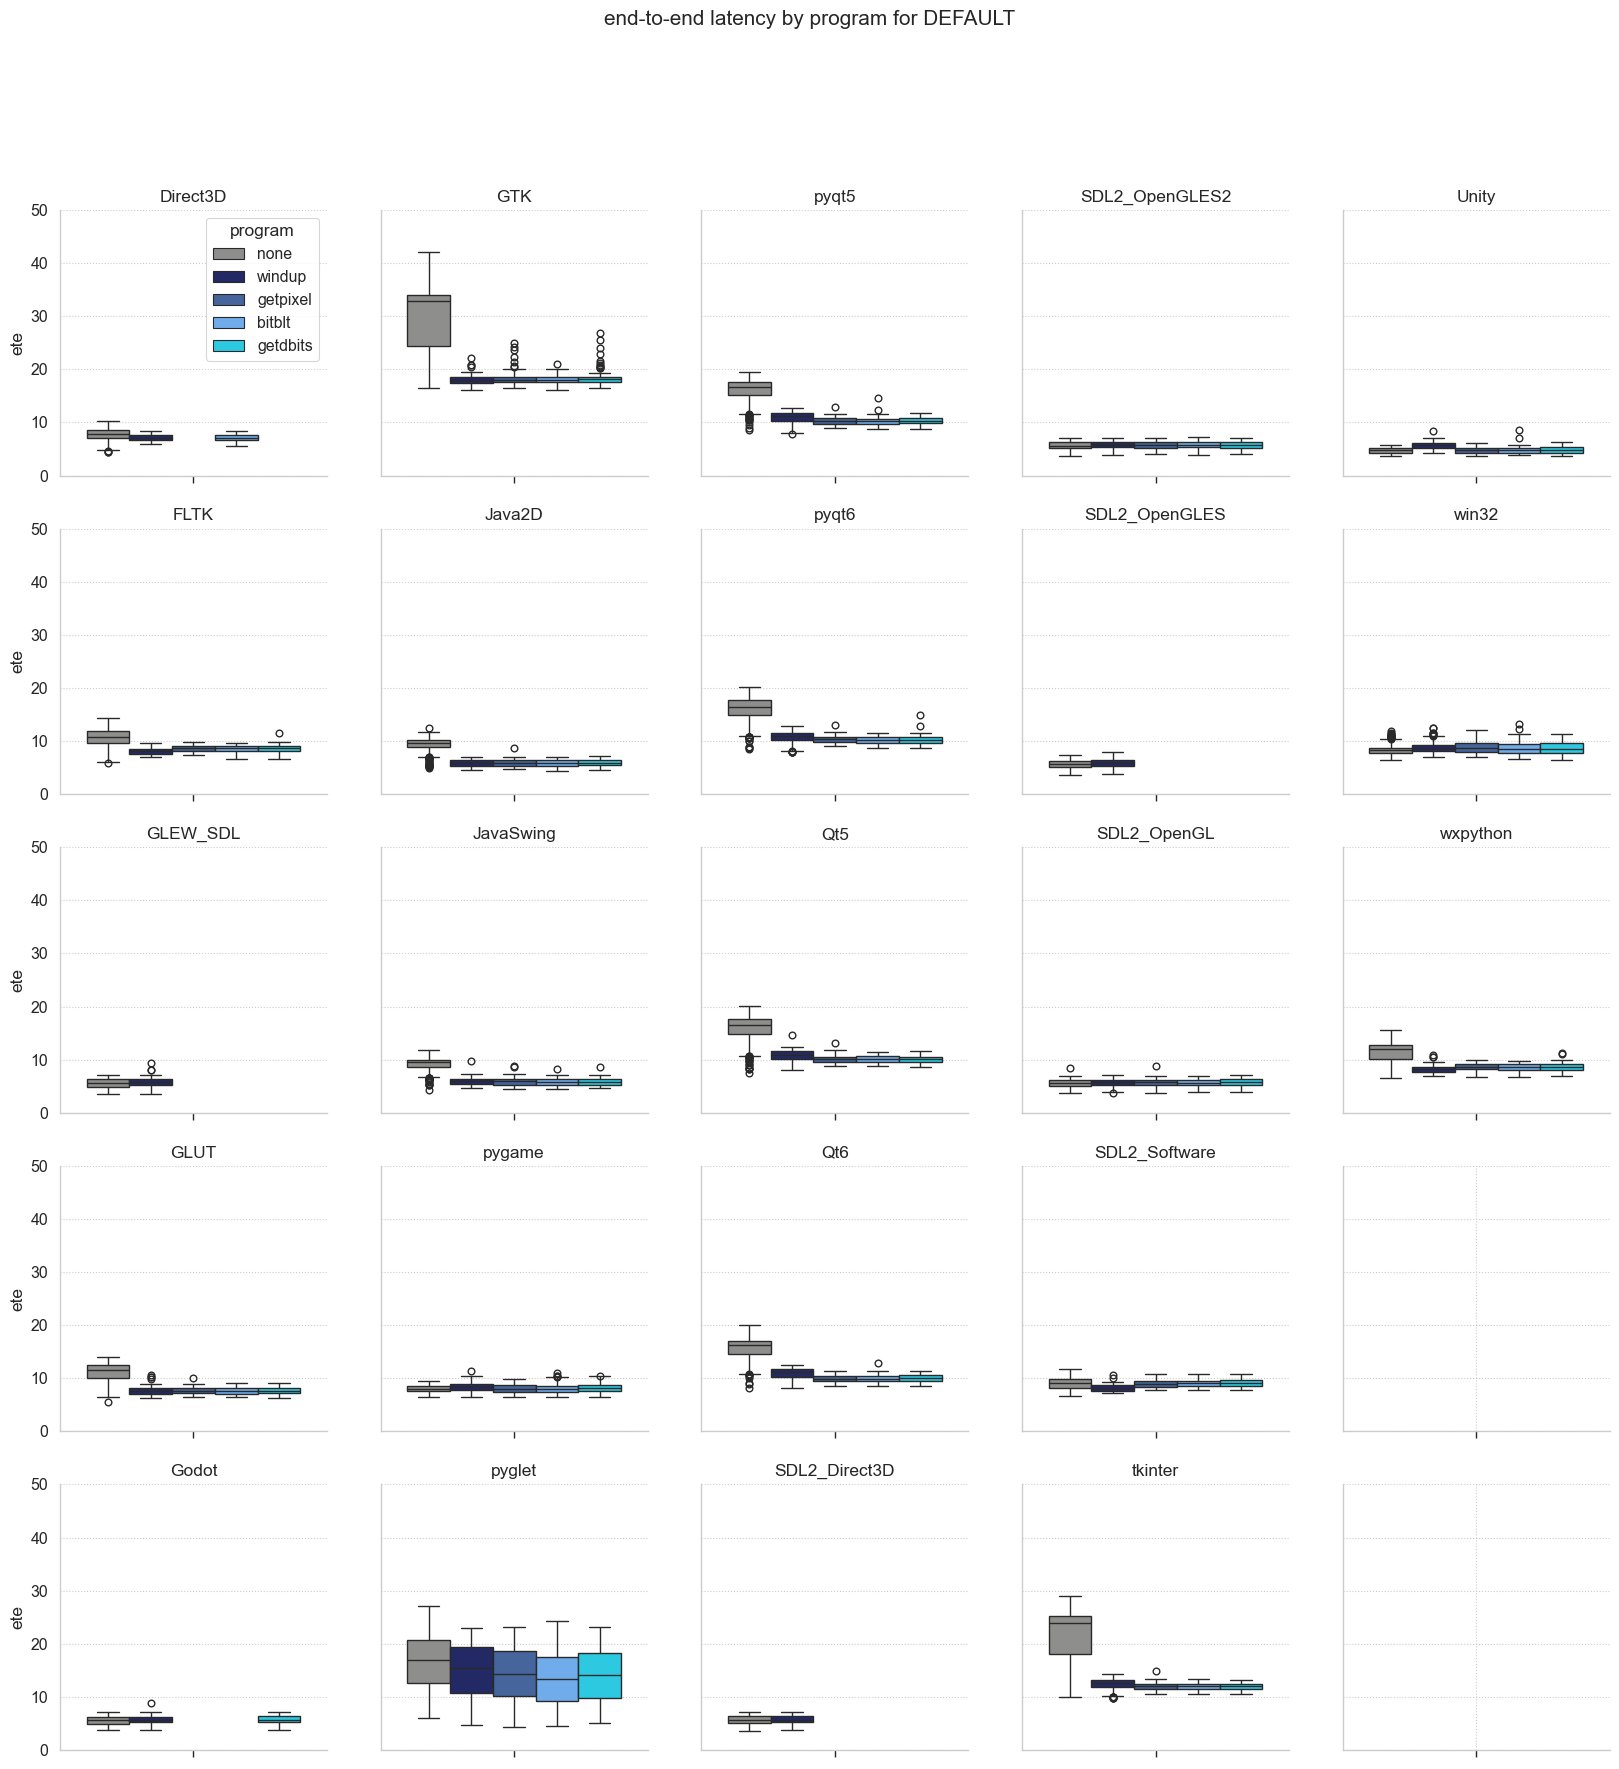

In [121]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for DEFAULT")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_default[data_default['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_BLUES_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 50)
    axes[x, y].get_legend().set_visible(False)
axes[0, 0].get_legend().set_visible(True)

sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1921905524.py:8: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=axes[x, y], data=data_image[data_image['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_GREENS)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1921905524.py:8: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=axes[x, y], data=data_image[data_image['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_GREENS)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1921905524.py:8: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxpl

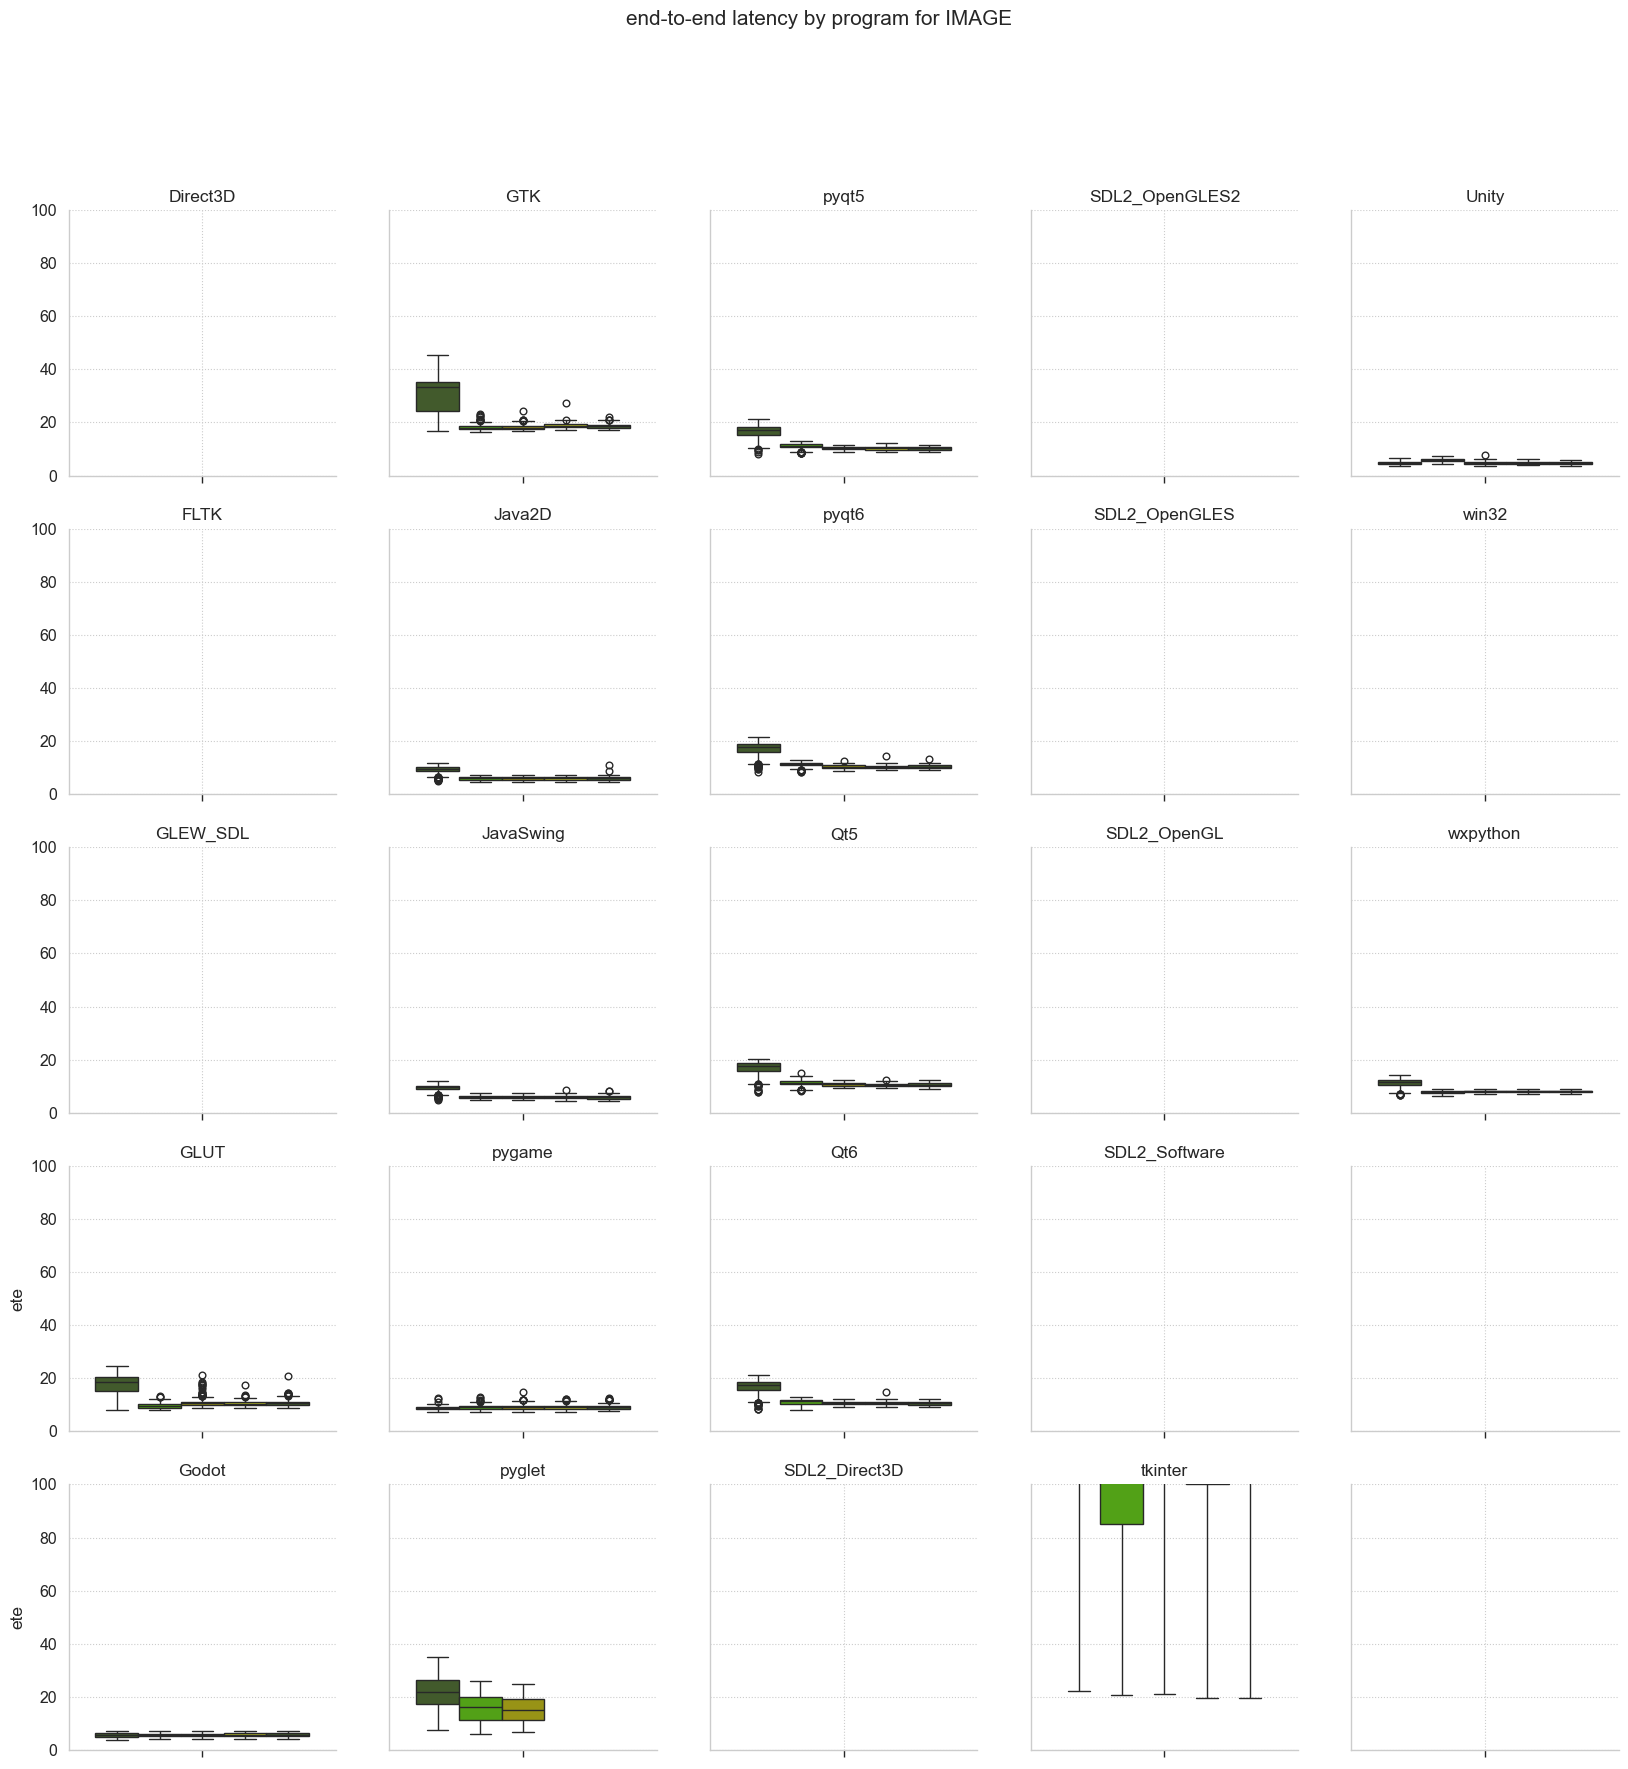

In [122]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True, sharey=True)
fig.suptitle("end-to-end latency by program for IMAGE")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_image[data_image['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_GREENS)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 100)
    try:
        axes[x, y].get_legend().set_visible(False)
    except:
        pass
#axes[0, 0].get_legend().set_visible(True)

sns.despine(bottom = False, left = False)

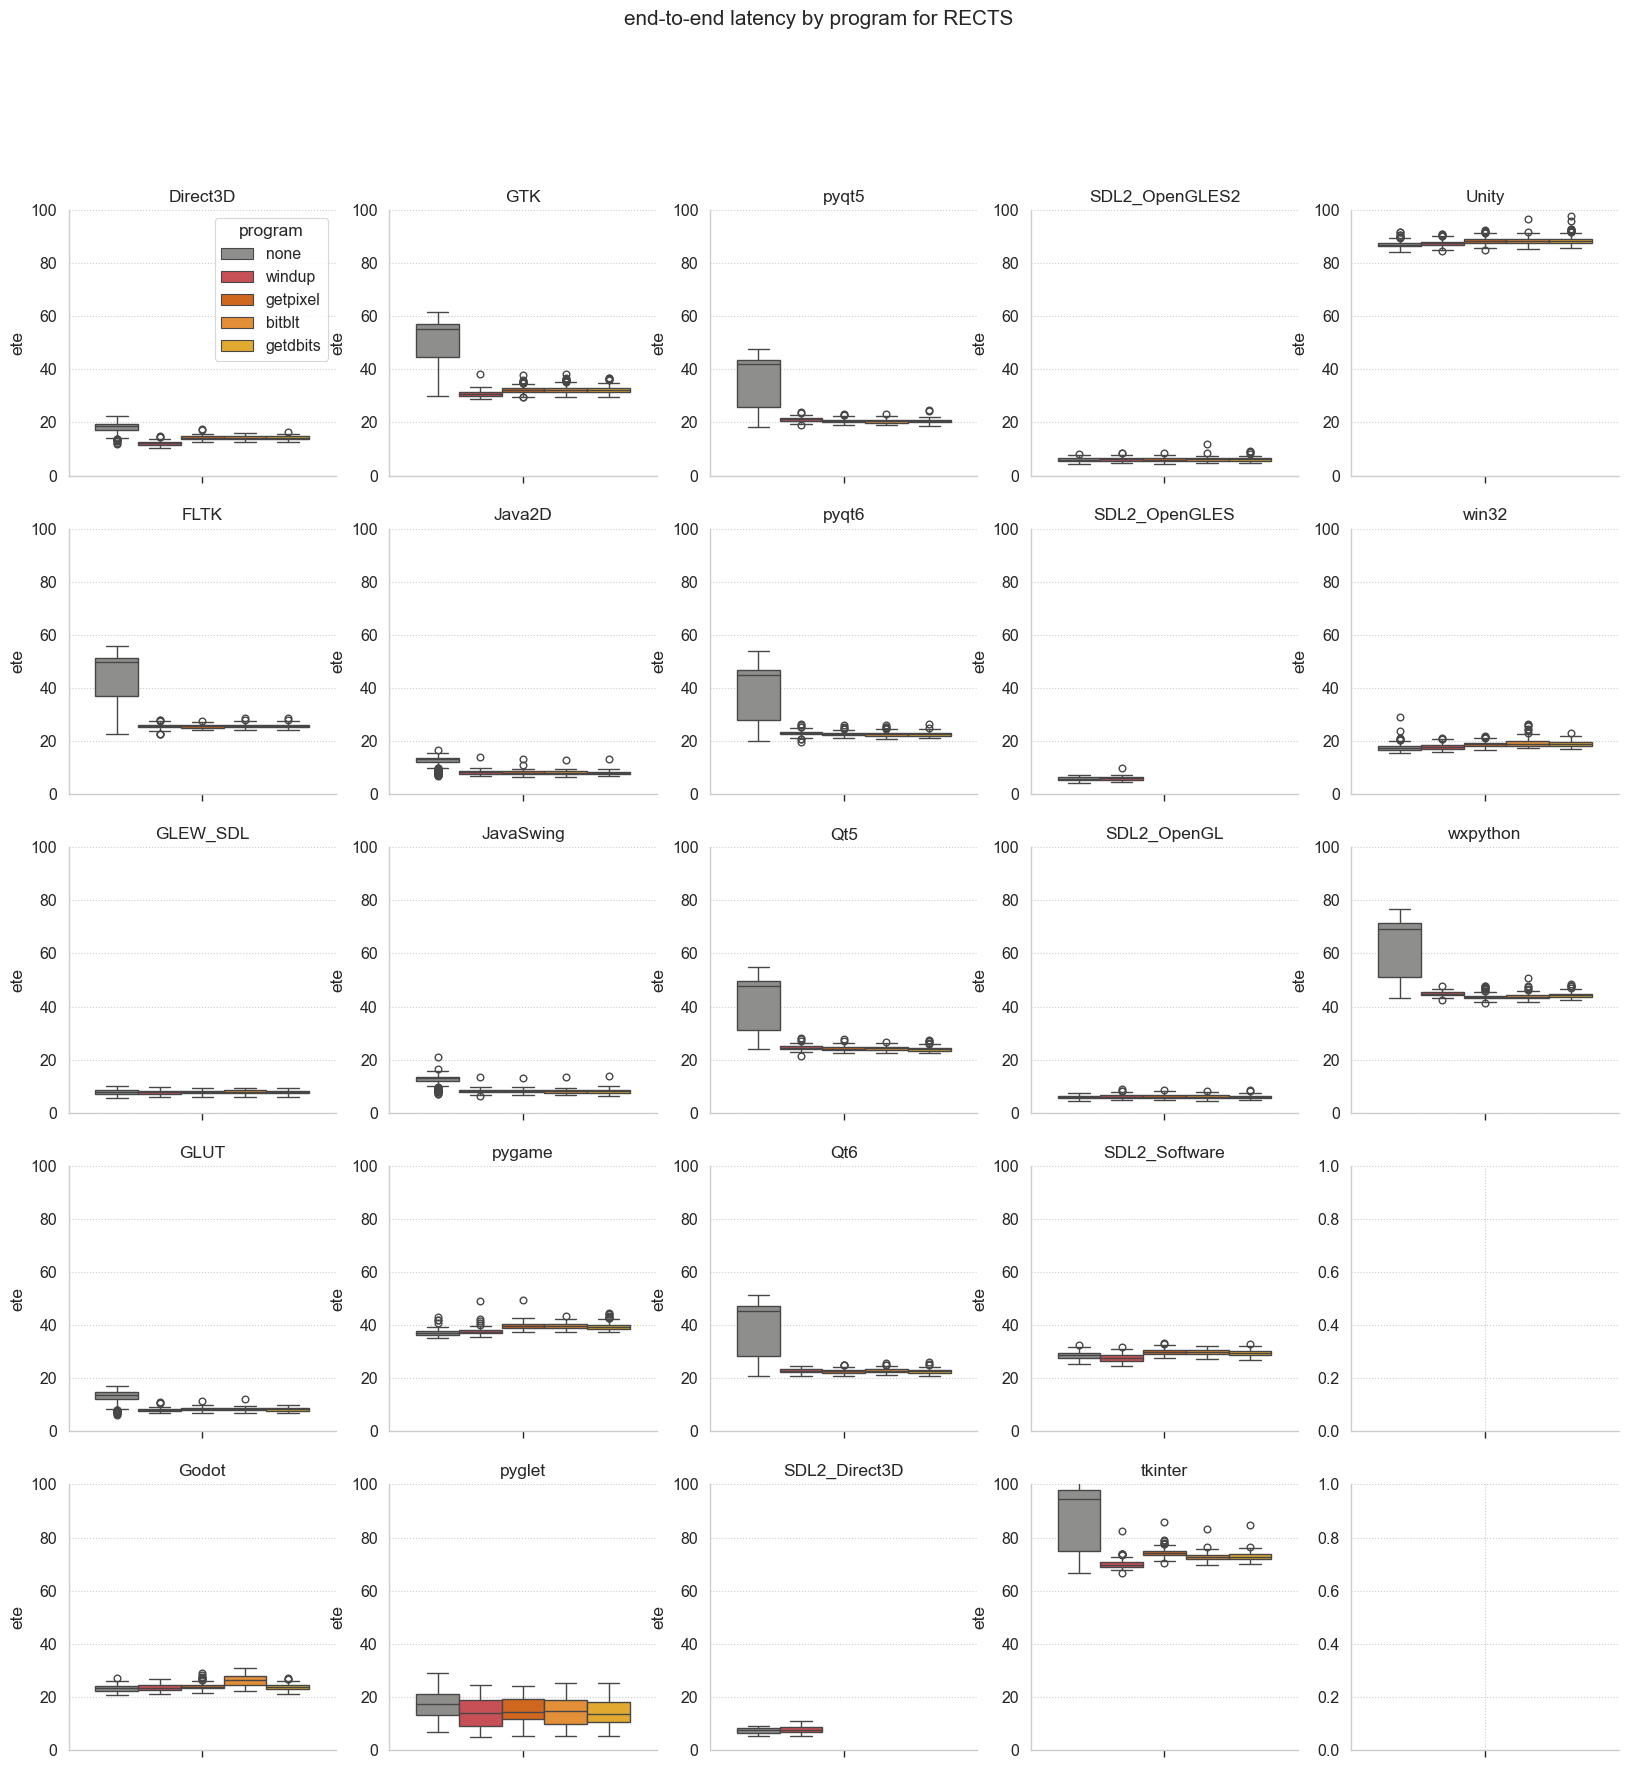

In [123]:
fig, axes = plt.subplots(sqrt, sqrt, figsize=(20, 20), sharex=True)
fig.suptitle("end-to-end latency by program for RECTS")

x = y = 0
for i, framework in enumerate(framework_list):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_rects[data_rects['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_REDS_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 100)
    axes[x, y].get_legend().set_visible(False)
axes[0, 0].get_legend().set_visible(True)

sns.despine(bottom = False, left = False)

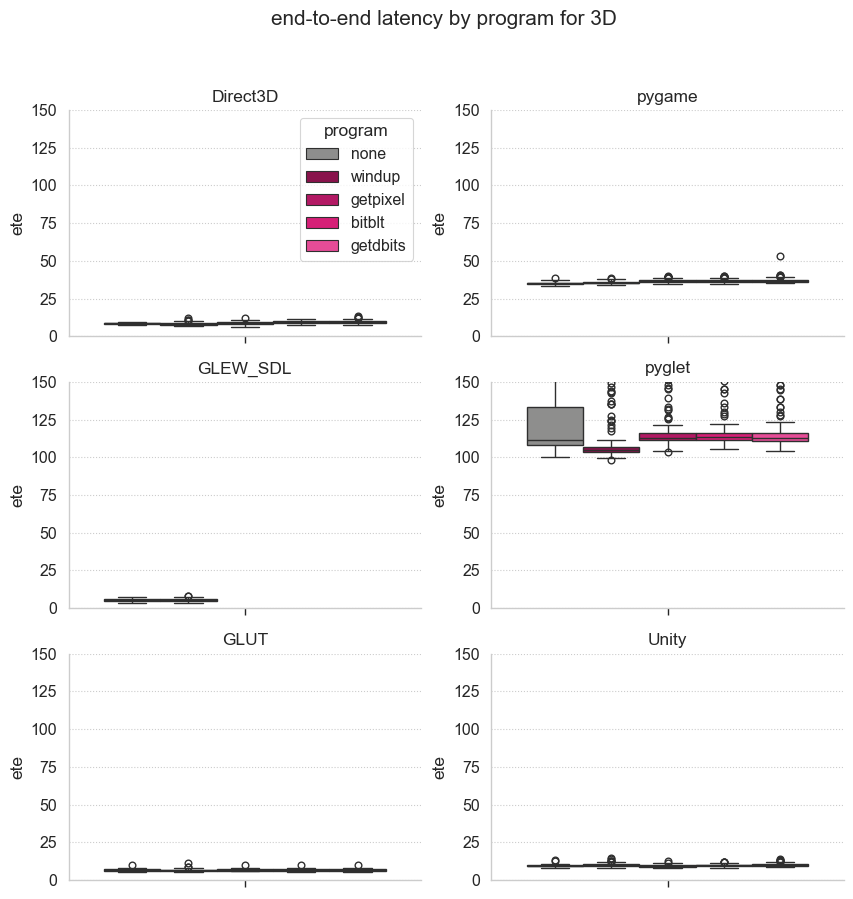

In [124]:
framework_count_3D = data_3D['framework'].nunique()
sqrt = int(math.sqrt(framework_count_3D)) + 1
framework_list_3D = data_3D['framework'].unique()

fig, axes = plt.subplots(sqrt, sqrt-1, figsize=(10, 10), sharex=True, sharey=False)
fig.suptitle("end-to-end latency by program for 3D")

x = y = 0
for i, framework in enumerate(framework_list_3D):
    x = i % sqrt
    y = y + 1 if (i != 0 and i % sqrt == 0) else y
    sns.boxplot(ax=axes[x, y], data=data_3D[data_3D['framework'] == framework], y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], palette=PALETTE_HEIDENELKE_W)
    axes[x, y].set_title(framework)
    axes[x, y].set_ylim(0, 150)
    axes[x, y].get_legend().set_visible(False)
axes[0, 0].get_legend().set_visible(True)

plt.gca().set_ylim(bottom=0)
sns.despine(bottom = False, left = False)

### overview

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1214070910.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)


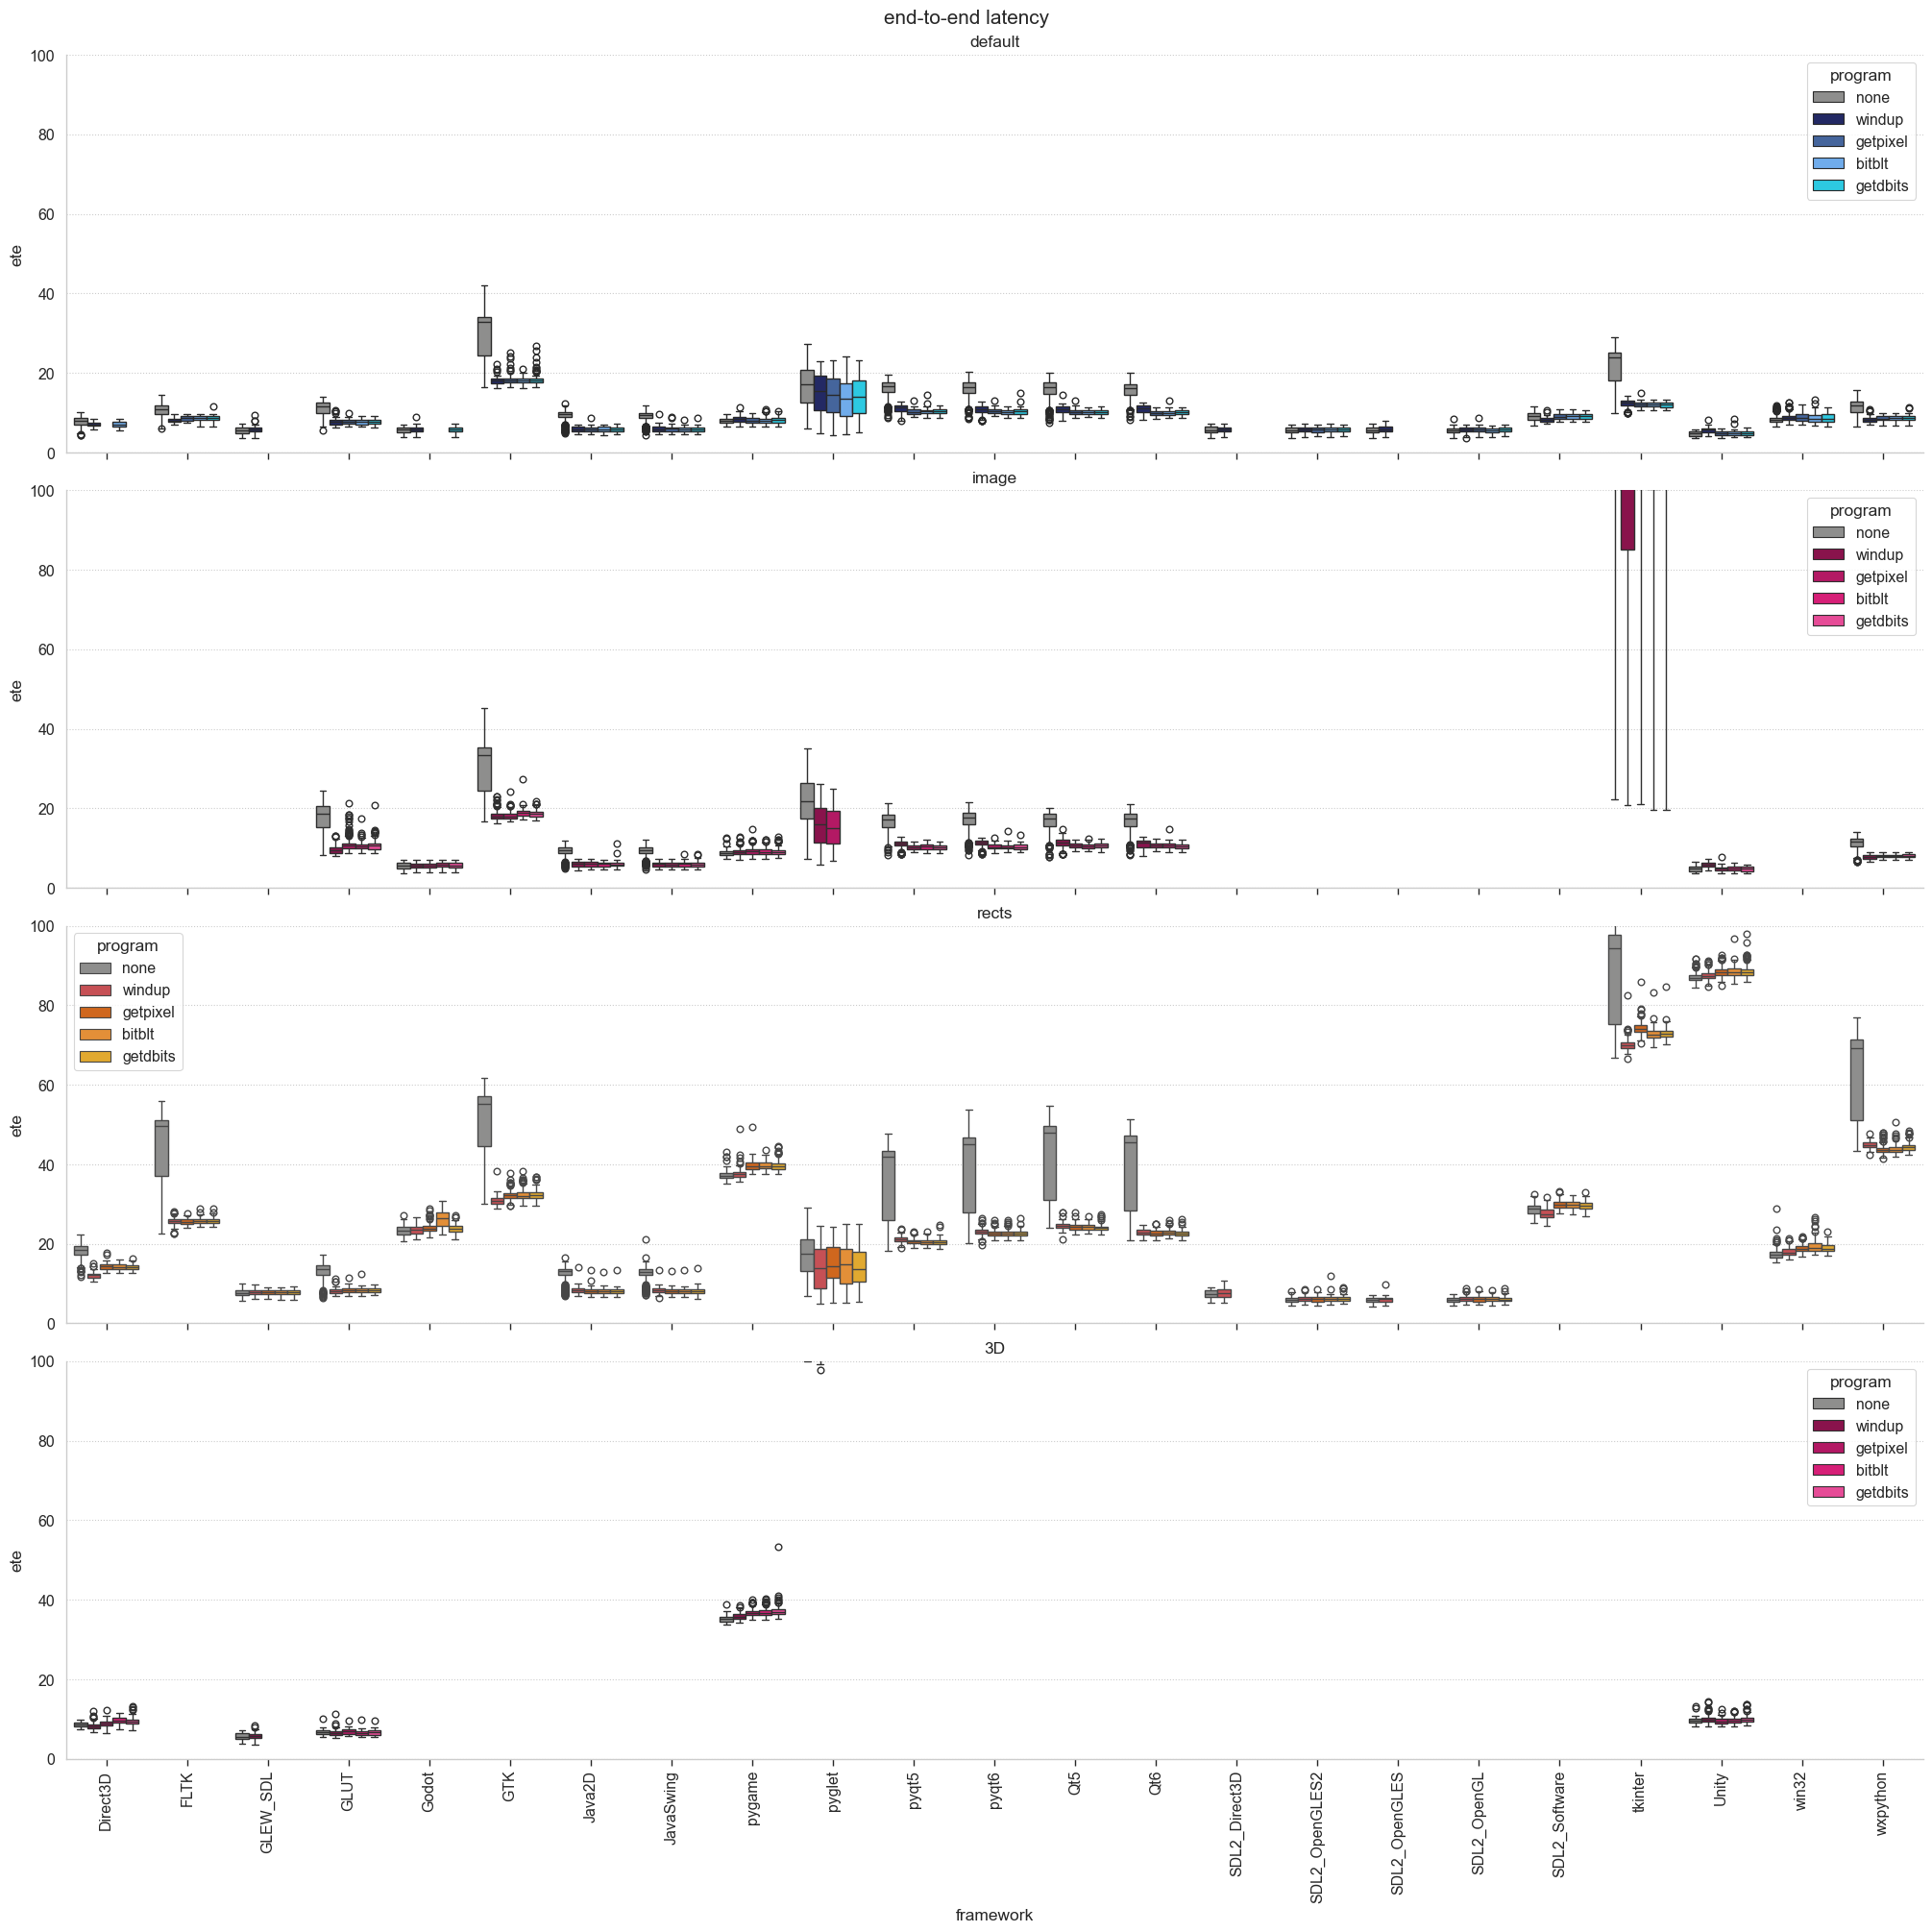

In [125]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.boxplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES_W)
plot_fs.set_title('default')
axs[0].set_ylim(0, 100)

plot_small = sns.boxplot(ax=axs[1], data=data[data['complexity'] == 'image'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W)
plot_small.set_title('image')
axs[1].set_ylim(0, 100)

plot_nfs = sns.boxplot(ax=axs[2], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_W)
plot_nfs.set_title('rects')
axs[2].set_ylim(0, 100)

plot_small = sns.boxplot(ax=axs[3], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W)
plot_small.set_title('3D')
axs[3].set_ylim(0, 100)

axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1015937275.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)


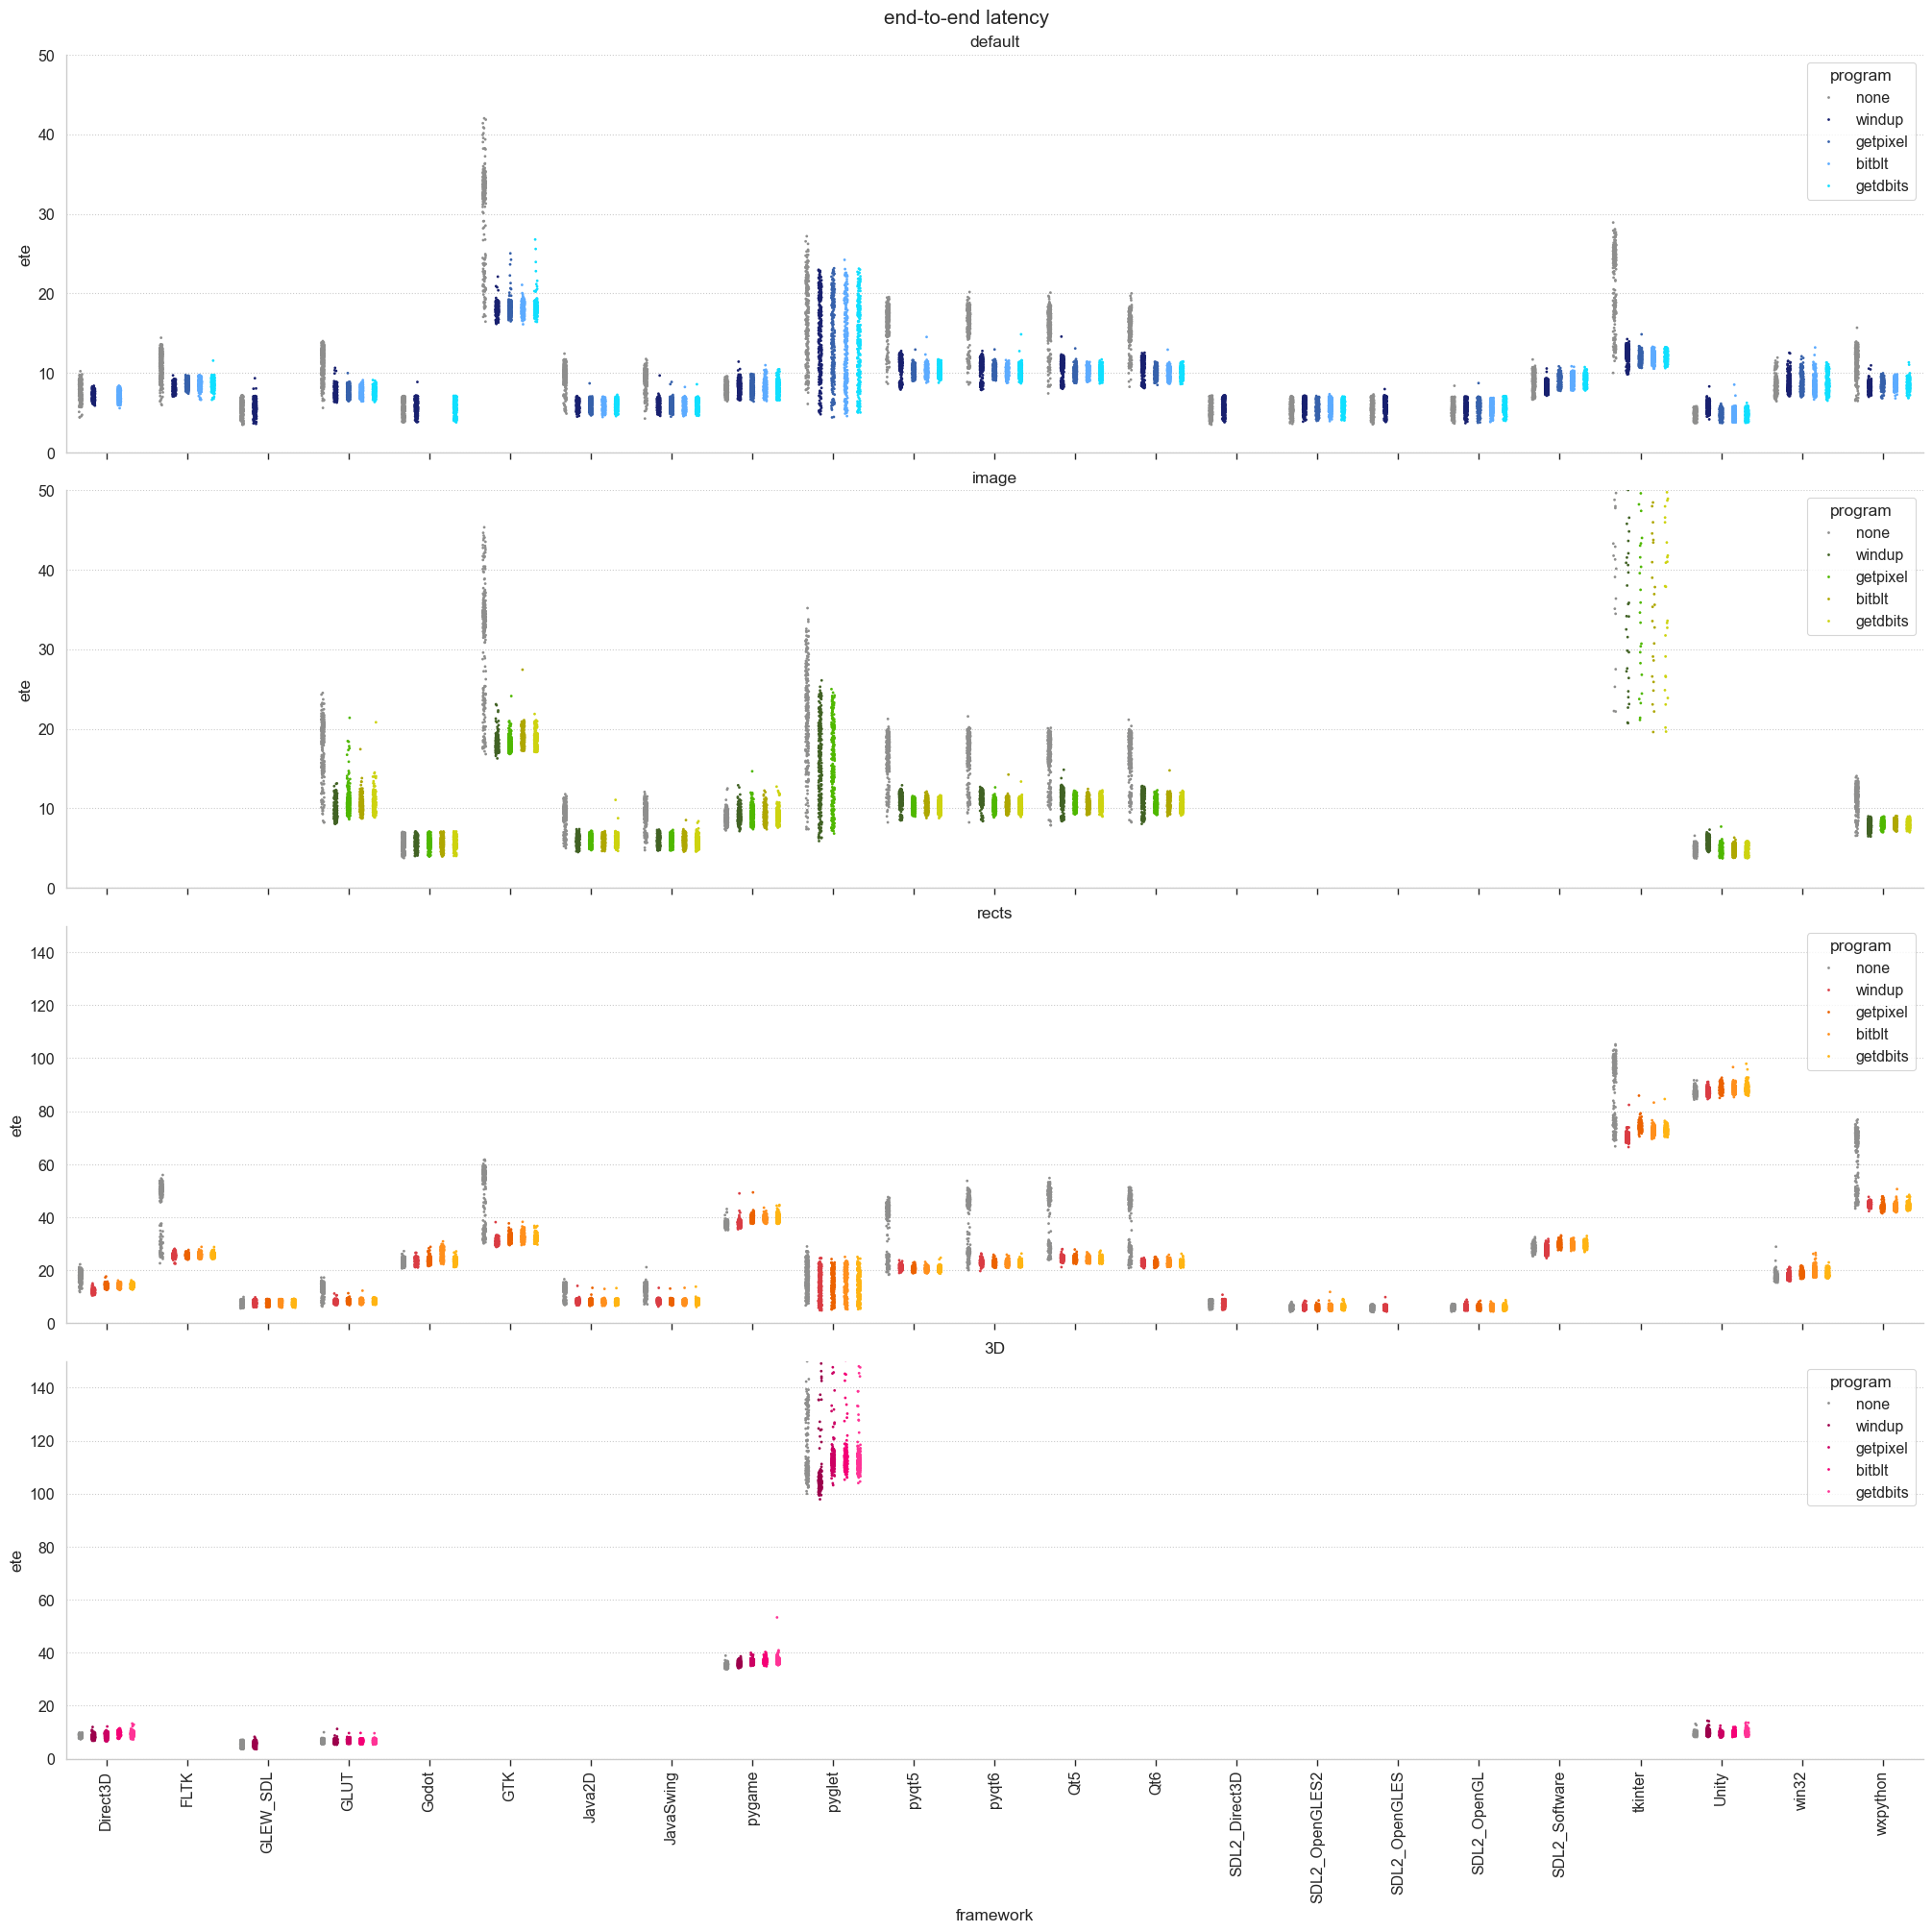

In [138]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("end-to-end latency")

plot_fs = sns.stripplot(ax=axs[0], data=data[data['complexity'] == 'default'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES_W, size=2)
plot_fs.set_title('default')
axs[0].set_ylim(0, 50)

plot_small = sns.stripplot(ax=axs[1], data=data[data['complexity'] == 'image'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_GREENS_W, size=2)
plot_small.set_title('image')
axs[1].set_ylim(0, 50)

plot_nfs = sns.stripplot(ax=axs[2], data=data[data['complexity'] == 'rects'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS_W, size=2)
plot_nfs.set_title('rects')
axs[2].set_ylim(0, 150)

plot_small = sns.stripplot(ax=axs[3], data=data[data['complexity'] == '3D'], x='framework', y='ete', hue='program', hue_order=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE_W, size=2)
plot_small.set_title('3D')
axs[3].set_ylim(0, 150)

axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)

sns.despine(bottom = False, left = False)

## End-to-end latency: Descriptive Stats

### DEFAULT

In [127]:
data_temp = data_default.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_default_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_default_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,5750.000000,5750.000000,4500.000000,4750.000000,4750.000000
mean,11.095581,8.542204,9.112872,8.943221,8.917856
std,6.572898,3.466032,3.514562,3.649151,3.483992
min,3.490000,3.586000,3.682000,3.777000,3.730000
25%,6.314000,6.031000,6.572750,6.558000,6.318000
50%,9.147000,7.673000,8.762000,8.513000,8.541000
75%,14.561000,10.335500,10.334750,10.154000,10.245000
max,42.009000,22.965000,25.028000,106.208000,26.773000


### RECTS

In [128]:
data_temp = data_rects.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_rects_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_rects_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,5750.000000,5746.000000,5250.000000,5250.000000,5250.000000
mean,31.184570,23.550634,25.705786,26.607650,26.240579
std,44.019554,20.234210,21.008036,48.684456,49.607713
min,4.220000,4.448000,4.449000,4.417000,4.640000
25%,11.748000,8.092000,8.685000,8.714250,8.618000
50%,22.936000,21.359000,22.152000,22.240000,22.057500
75%,46.208250,26.850750,30.357250,30.465500,30.293000
max,2802.602000,91.105000,92.652000,2820.288000,3284.645000


### 3D

In [129]:
data_temp = data_3D.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_3D_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_3D_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,1500.000000,1500.000000,1250.000000,1250.000000,1250.000000
mean,32.171992,30.565653,37.611014,37.875107,37.889238
std,45.842391,42.238120,48.139815,48.203456,48.215037
min,3.728000,3.633000,5.639000,5.503000,5.406000
25%,6.796000,6.621750,8.233500,8.813750,8.715000
50%,9.147000,9.050500,9.736500,10.194500,10.103500
75%,35.205500,35.723250,37.103750,37.294750,37.509750
max,271.752000,245.764000,262.198000,260.494000,262.371000


### OVERALL

In [130]:
data_temp = data.copy()

data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'ete'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'ete'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'ete'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'ete'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'ete'].reset_index(drop=True)

data_desc = pd.concat([data_none_ete, data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['none', 'windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,none,windup,getpixel,bitblt,getdbits
count,16528.000000,16496.000000,14500.000000,14500.000000,14500.000000
mean,22.997690,18.197103,20.684594,20.858891,20.732837
std,37.257775,27.166218,32.703216,42.051435,42.511268
min,3.490000,3.586000,3.682000,3.777000,3.719000
25%,7.468750,6.701000,7.631500,7.468000,7.373000
50%,12.609500,9.002500,10.010000,9.883500,9.913000
75%,23.896500,18.697000,21.147000,21.065500,21.000000
max,2802.602000,283.460000,345.292000,2820.288000,3284.645000


### Default by framework

In [131]:
data_temp = data_default.copy()

data_none = data_temp[data_temp['program'] == 'none']
data_windup = data_temp[data_temp['program'] == 'windup']
data_getpixel = data_temp[data_temp['program'] == 'getpixel']
data_bitblt = data_temp[data_temp['program'] == 'bitblt']
data_getdbits = data_temp[data_temp['program'] == 'getdbits']

medians = pd.DataFrame(columns=['framework', 'none', 'windup', 'windup_difference', 'getpixel', 'getpixel_difference', 'bitblt', 'bitblt_difference', 'getdbits', 'getdbits_difference'])
length = 0
for i, framework in enumerate(framework_list):
    lenght = i
    median_none = data_none[data_none['framework'] == framework]['ete'].median()
    median_windup = data_windup[data_windup['framework'] == framework]['ete'].median()
    median_getpixel = data_getpixel[data_getpixel['framework'] == framework]['ete'].median()
    median_bitblt = data_bitblt[data_bitblt['framework'] == framework]['ete'].median()
    median_getdbits = data_getdbits[data_getdbits['framework'] == framework]['ete'].median()    
    medians.loc[i] = [framework, median_none, median_windup, median_windup - median_none, median_getpixel, median_getpixel- median_none, median_bitblt, median_bitblt - median_none, median_getdbits, median_getdbits - median_none]

medians.loc[-1] = ['mean', medians['none'].mean(), medians['windup'].mean(), medians['windup_difference'].mean(), medians['getpixel'].mean(), medians['getpixel_difference'].mean(), medians['bitblt'].mean(), medians['bitblt_difference'].mean(), medians['getdbits'].mean(), medians['getdbits_difference'].mean()]


display(medians)

,framework,none,windup,windup_difference,getpixel,getpixel_difference,bitblt,bitblt_difference,getdbits,getdbits_difference
0,Direct3D,7.846000,7.093500,-0.752500,NaN,NaN,7.036000,-0.810000,NaN,NaN
1,FLTK,10.741500,8.040500,-2.701000,8.614500,-2.12700,8.667000,-2.074500,8.650500,-2.091000
2,GLEW_SDL,5.517000,5.791000,0.274000,NaN,NaN,NaN,NaN,NaN,NaN
3,GLUT,11.571500,7.595500,-3.976000,7.615000,-3.95650,7.660000,-3.911500,7.660500,-3.911000
4,Godot,5.678500,5.742500,0.064000,NaN,NaN,NaN,NaN,5.695000,0.016500
5,GTK,32.816500,18.040500,-14.776000,18.045000,-14.77150,18.060000,-14.756500,18.124500,-14.692000
6,Java2D,9.567000,5.822000,-3.745000,5.895500,-3.67150,5.887000,-3.680000,5.887000,-3.680000
7,JavaSwing,9.483000,5.886500,-3.596500,5.911500,-3.57150,5.804000,-3.679000,5.838000,-3.645000
8,pygame,8.010000,8.427500,0.417500,8.044500,0.03450,8.004000,-0.006000,8.231500,0.221500
9,pyglet,17.024500,15.352000,-1.672500,14.397500,-2.62700,13.452500,-3.572000,14.095000,-2.929500


In [132]:
print(medians.to_latex(index=False,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

\begin{tabular}{lrrrrrrrrr}
\toprule
framework & none & windup & windup_difference & getpixel & getpixel_difference & bitblt & bitblt_difference & getdbits & getdbits_difference \\
\midrule
Direct3D & 7.85 & 7.09 & -0.75 & NaN & NaN & 7.04 & -0.81 & NaN & NaN \\
FLTK & 10.74 & 8.04 & -2.70 & 8.61 & -2.13 & 8.67 & -2.07 & 8.65 & -2.09 \\
GLEW_SDL & 5.52 & 5.79 & 0.27 & NaN & NaN & NaN & NaN & NaN & NaN \\
GLUT & 11.57 & 7.60 & -3.98 & 7.62 & -3.96 & 7.66 & -3.91 & 7.66 & -3.91 \\
Godot & 5.68 & 5.74 & 0.06 & NaN & NaN & NaN & NaN & 5.70 & 0.02 \\
GTK & 32.82 & 18.04 & -14.78 & 18.05 & -14.77 & 18.06 & -14.76 & 18.12 & -14.69 \\
Java2D & 9.57 & 5.82 & -3.75 & 5.90 & -3.67 & 5.89 & -3.68 & 5.89 & -3.68 \\
JavaSwing & 9.48 & 5.89 & -3.60 & 5.91 & -3.57 & 5.80 & -3.68 & 5.84 & -3.65 \\
pygame & 8.01 & 8.43 & 0.42 & 8.04 & 0.03 & 8.00 & -0.01 & 8.23 & 0.22 \\
pyglet & 17.02 & 15.35 & -1.67 & 14.40 & -2.63 & 13.45 & -3.57 & 14.09 & -2.93 \\
pyqt5 & 16.71 & 11.23 & -5.47 & 10.22 & -6.49 & 10.2

# Differences

In [133]:
data_running = data[data['program'] != 'none']

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1007830807.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


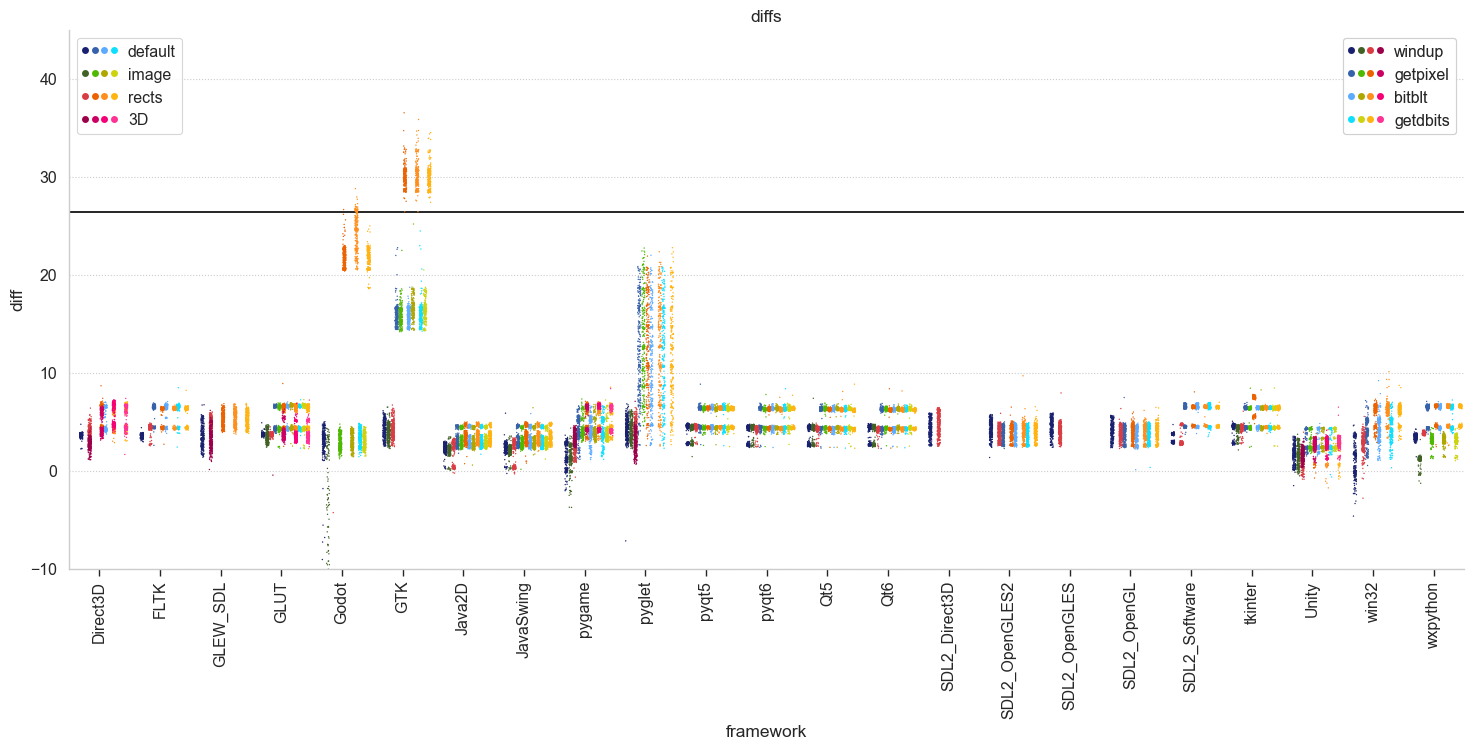

In [134]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data_running[data_running['complexity'] == 'default'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == 'image'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_GREENS, transform=offset(0.05)+trans, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == 'rects'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.1)+trans, size=1)
sns.stripplot(data=data_running[data_running['complexity'] == '3D'], x='framework', y='diff', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=1)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(-10, 45)

agg_mean = round(np.mean(diff_means), 1) / 1000
plt.axhline(agg_mean, color='black')

handles, labels = plot.get_legend_handles_labels()

handles_windup = (handles[0], handles[4], handles[8], handles[12])
handles_getpixel = (handles[1], handles[5], handles[9], handles[13])
handles_bitblt = (handles[2], handles[6], handles[10], handles[14])
handles_getdbits = (handles[3], handles[7], handles[11], handles[15])

handles_default = (handles[0], handles[1], handles[2], handles[3])
handles_image = (handles[4], handles[5], handles[6], handles[7])
handles_rects = (handles[8], handles[9], handles[10], handles[11])
handles_3d = (handles[12], handles[13], handles[14], handles[15])

condition_legend = plot.legend([handles_default, handles_image, handles_rects, handles_3d], ['default', 'image', 'rects', '3D'], markerscale=5., loc='upper left', handler_map={tuple: HandlerTuple(ndivide=None)})
program_legend = plot.legend([handles_windup, handles_getpixel, handles_bitblt, handles_getdbits], ['windup', 'getpixel', 'bitblt', 'getdbits'], markerscale=5., handler_map={tuple: HandlerTuple(ndivide=None)})
plt.gca().add_artist(condition_legend)
plt.gca().add_artist(program_legend)

plot.set_title('diffs')
sns.despine(bottom = False, left = False)

In [135]:
data_temp = data.copy()

# data_none_ete = data_temp.loc[data_temp['program'] == 'none', 'diff'].reset_index(drop=True)
data_windup_ete = data_temp.loc[data_temp['program'] == 'windup', 'diff'].reset_index(drop=True)
data_getpixel_ete = data_temp.loc[data_temp['program'] == 'getpixel', 'diff'].reset_index(drop=True)
data_bitblt_ete = data_temp.loc[data_temp['program'] == 'bitblt', 'diff'].reset_index(drop=True)
data_getdbits_ete = data_temp.loc[data_temp['program'] == 'getdbits', 'diff'].reset_index(drop=True)

data_desc = pd.concat([data_windup_ete, data_getpixel_ete, data_bitblt_ete, data_getdbits_ete], axis=1, keys=['windup', 'getpixel', 'bitblt', 'getdbits'])

display(data_desc.describe())

,windup,getpixel,bitblt,getdbits
count,16496.000000,14500.000000,14500.000000,14500.000000
mean,0.967506,8.274432,8.479962,8.291938
std,91.416369,16.708412,31.449477,31.930961
min,-8389.710000,-0.753000,-1.754000,-0.847000
25%,2.491000,3.859250,3.879000,3.712750
50%,3.541500,4.567000,4.549000,4.495000
75%,4.339000,6.463000,6.438000,6.420000
max,7.931000,259.892000,2818.179000,3282.391000


In [136]:
print(data_desc.describe().to_latex(index=True,
                  formatters={"name": str.upper},
                  float_format="{:.2f}".format,
))

\begin{tabular}{lrrrr}
\toprule
 & windup & getpixel & bitblt & getdbits \\
\midrule
count & 16496.00 & 14500.00 & 14500.00 & 14500.00 \\
mean & 0.97 & 8.27 & 8.48 & 8.29 \\
std & 91.42 & 16.71 & 31.45 & 31.93 \\
min & -8389.71 & -0.75 & -1.75 & -0.85 \\
25% & 2.49 & 3.86 & 3.88 & 3.71 \\
50% & 3.54 & 4.57 & 4.55 & 4.50 \\
75% & 4.34 & 6.46 & 6.44 & 6.42 \\
max & 7.93 & 259.89 & 2818.18 & 3282.39 \\
\bottomrule
\end{tabular}



C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1499745393.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_20116\1499745393.py:30: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


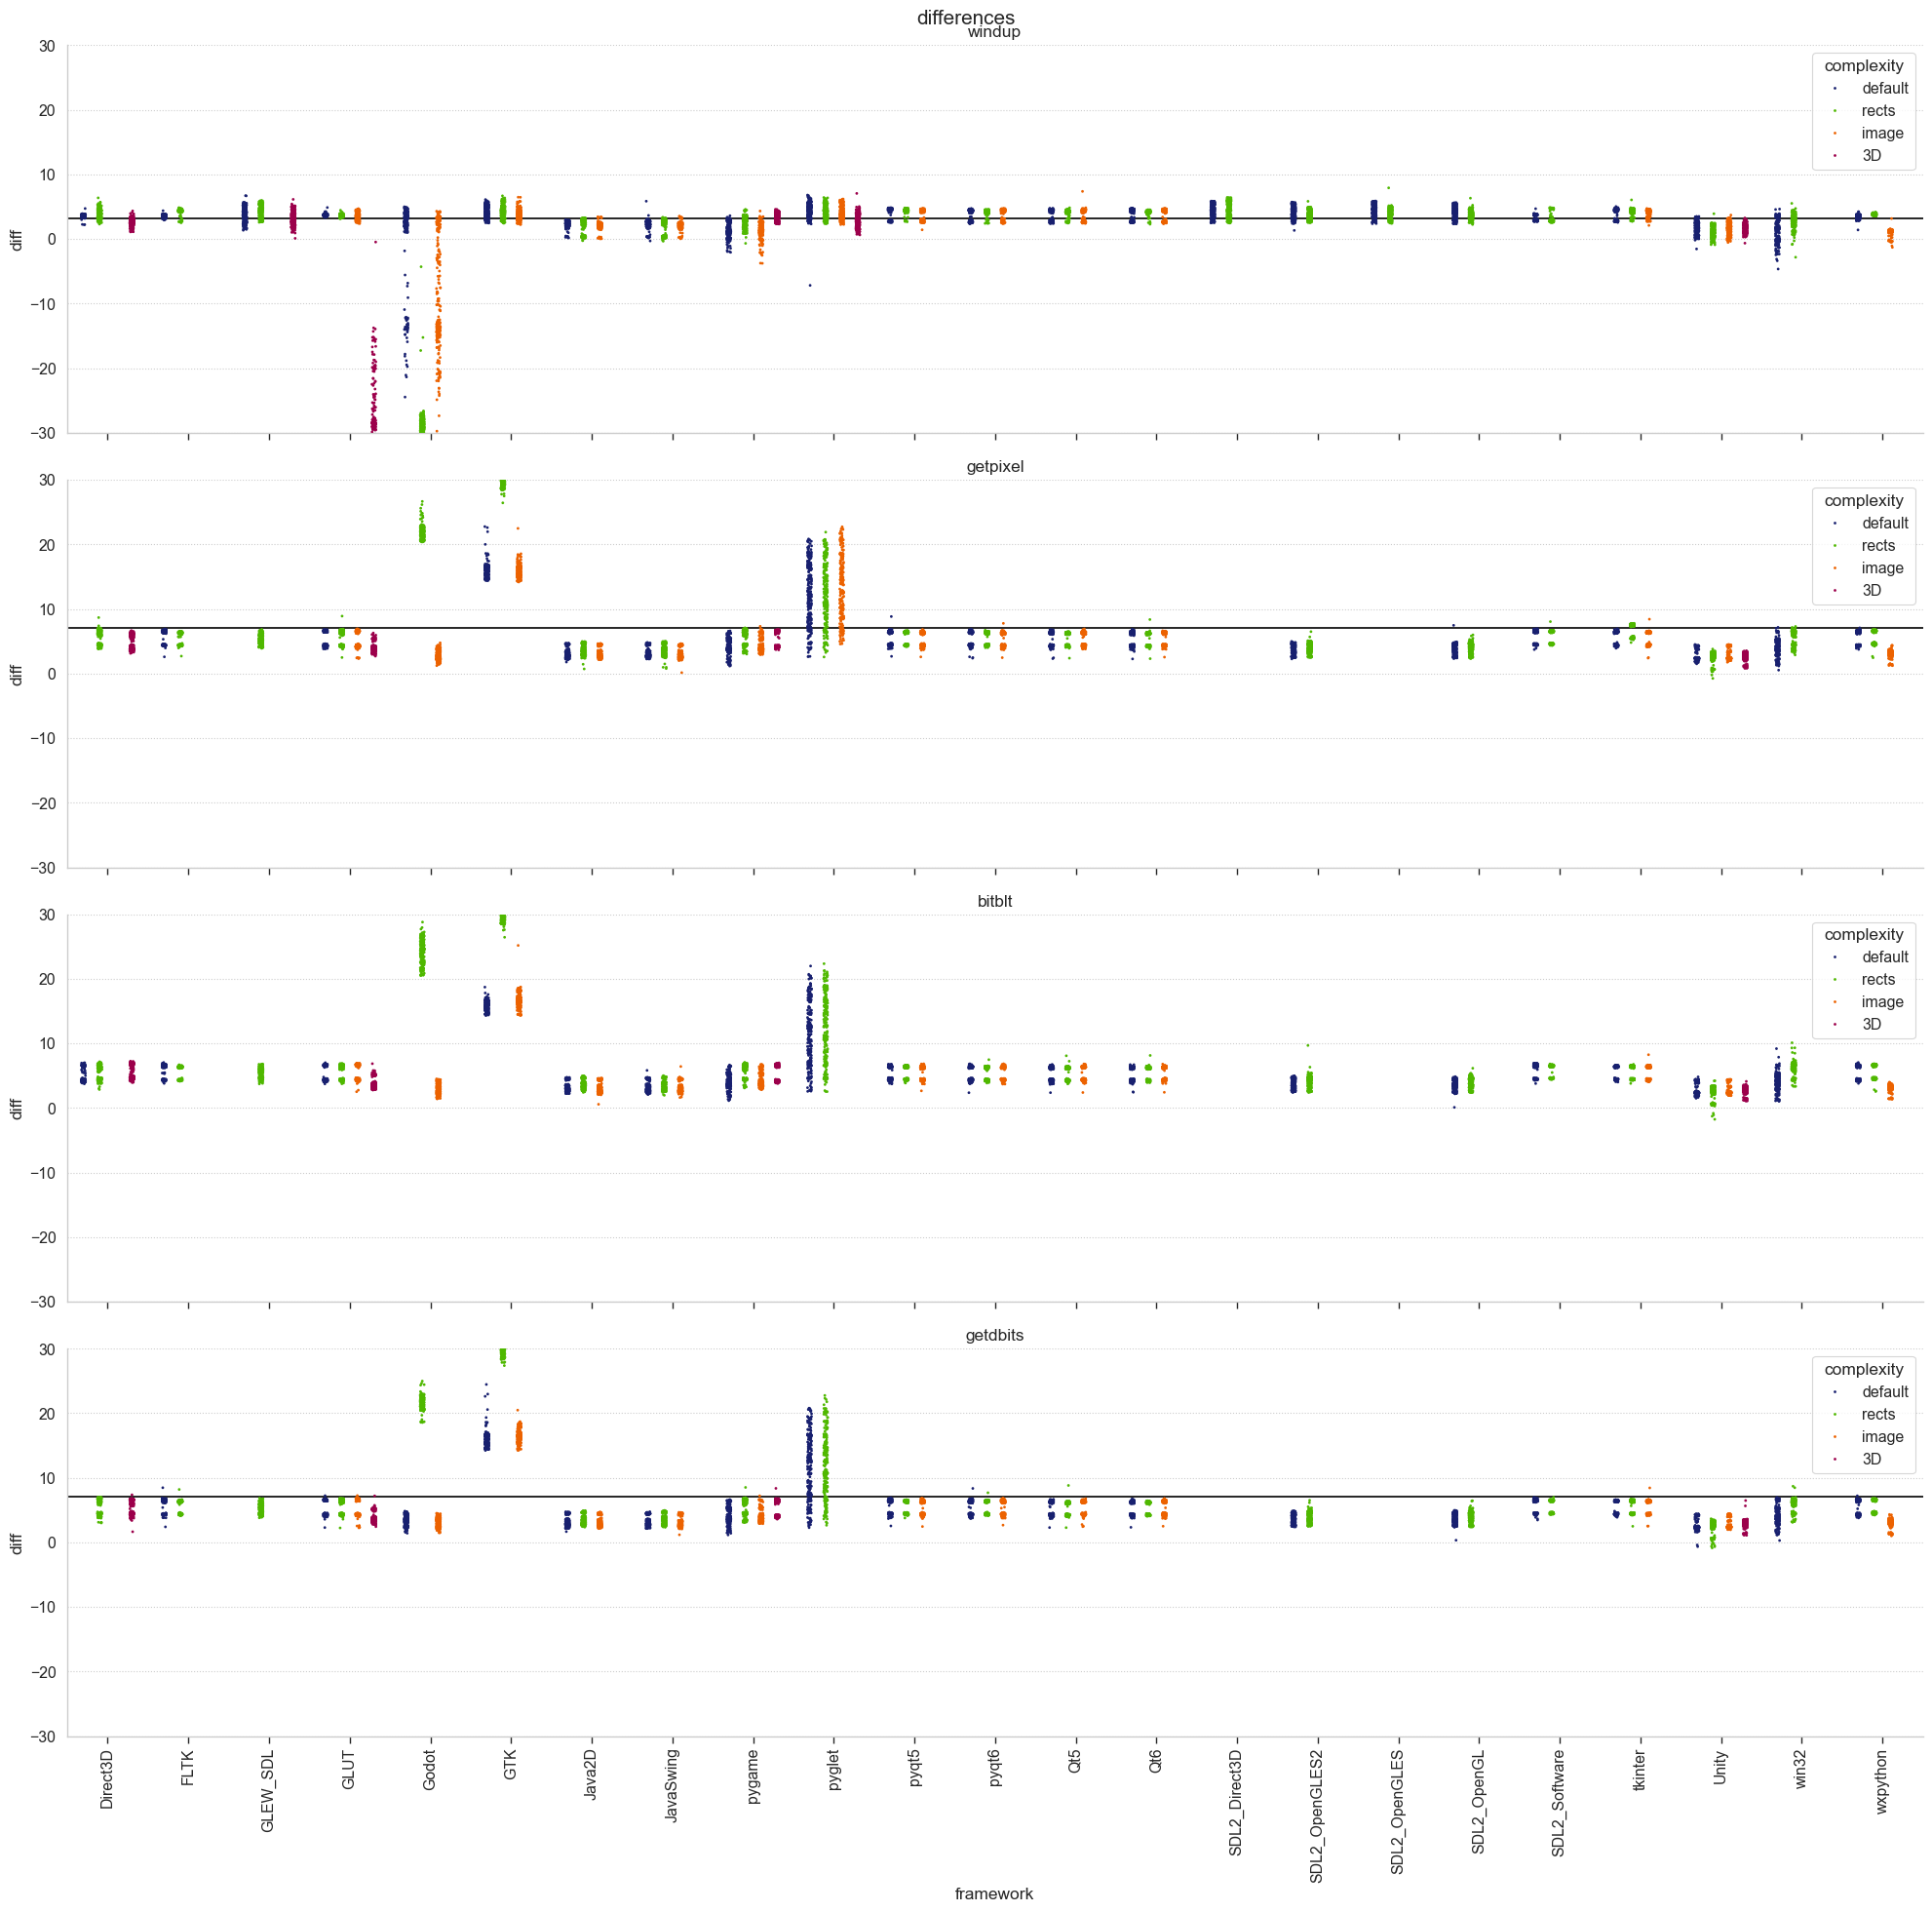

In [139]:
fig, axs = plt.subplots(4, 1, layout='constrained', sharex=True, figsize=(20, 20))
fig.suptitle("differences")

plot_windup = sns.stripplot(ax=axs[0], data=data_running[data_running['program'] == 'windup'], x='framework', y='diff', hue='complexity', hue_order=['default', 'rects', 'image', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_windup.set_title('windup')
axs[0].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['windup_fullscreen']), 1) / 1000
axs[0].axhline(agg_mean, color='black')

plot_getpixel = sns.stripplot(ax=axs[1], data=data_running[data_running['program'] == 'getpixel'], x='framework', y='diff', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_getpixel.set_title('getpixel')
axs[1].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['getpixel']), 1) / 1000
axs[1].axhline(agg_mean, color='black')

plot_bitblt = sns.stripplot(ax=axs[2], data=data_running[data_running['program'] == 'bitblt'], x='framework', y='diff', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_bitblt.set_title('bitblt')
axs[2].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['bitblt']), 1) / 1000
axs[2].axhline(agg_mean, color='black')

plot_getdbits = sns.stripplot(ax=axs[3], data=data_running[data_running['program'] == 'getdbits'], x='framework', y='diff', hue='complexity', hue_order=['default', 'image', 'rects', '3D'], dodge=True, palette=PALETTE_MULTI, size=2)
plot_getdbits.set_title('getdbits')
axs[3].set_ylim(-30, 30)
agg_mean = round(np.mean(diff_program_means_dict['getdbits']), 1) / 1000
axs[3].axhline(agg_mean, color='black')

axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=90)

fig.tight_layout()
sns.despine(bottom = False, left = False)